## **AI & Cybersecurity Workshop**
# **Lab 1: Anomaly Detection**

In the first lab we will learn how to detect anomlaly using the KDD Cup 1999 dataset for network intrusion detection. You can be download the file kddcup.data_10_percent.gz via Link:
https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

We will try Anomaly Detection using random forest classifier that classify traffic as normal or attack based on the src_bytes (bytes sent) and dst_bytes (bytes received):

In [65]:
# Import the datasets saved in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Datasets/kddcup.data_10_percent.gz"

column_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
# create DataFrame for the dataset
df = pd.read_csv(file_path, header=None, names=column_names)
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate    label  
0                       0.0  normal.  
1                       0.0  normal.  
2                       0.0  normal.  
3                       0.0  normal.  
4                       0.0  normal.  

[5 rows x 42 columns]

# **Feature Exctraction**
Select Features, foucsing on **src_bytes**, **dst_bytes**, and **label** columns, we will get these labels:

In [ ]:
df2 = df[["src_bytes", "dst_bytes", "label"]]
df2.label.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

# **Label Processing**
We will convert the label column into:
*   0 = Normal traffic
*   1 = Attack

In [ ]:
import numpy as np
df2 = df[["src_bytes", "dst_bytes", "label"]].copy() # Make a new DataFrame for processing
labels = df2['label'].str.strip() # Remove white space
labels = labels.replace('normal.', 0) # Replace normal traffic with Label 0
labels = np.where(labels != 0, 1, 0) # Replace attack with Label 1
df2['label'] = labels
df2.label.unique()

array([0, 1])

# **Train Random Forest model**
Now we can train model using a Random Forest classifier to learn patterns distinguishing normal vs. attack traffic.

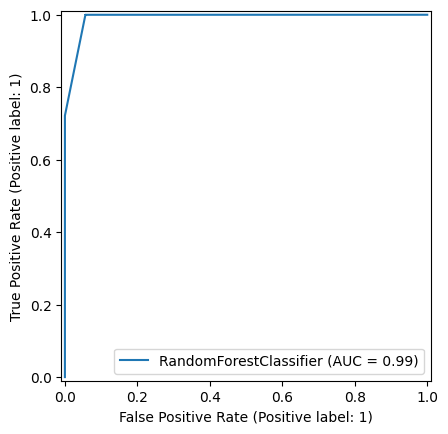

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split

# Split data: 80% of data is used to train the model, 20% is used to test it.
train, test = train_test_split(df2, test_size=0.2)
# Filter splits based to separate features from label
X_train = train.iloc[:, :-1] # features are everything but last column
y_train = train.iloc[:, -1] # last column is the label
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

# Train the Random Forest Classifier on train split
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
# ROC curve shows how well the model separates normal traffic from attacks.
RocCurveDisplay.from_estimator(
   clf, X_test, y_test)

plt.show()
#The closer the curve is to the top-left corner, the better the model.

________________________________________________________________________________


# **Lab 2: Spam Detection**

In the second lab we will learn how to detect spam using Ham or Spam dataset. You can download the dataset via Link:
https://media.geeksforgeeks.org/wp-content/uploads/20250320162008521713/spam_ham_dataset.csv

We will try Spam Detection using NLP with Tensorflow, one of the most popular deep learning libraries:

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

file_path = "/content/drive/MyDrive/Datasets/spam_ham_dataset.csv"
data = pd.read_csv(file_path)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

# **Label Processing**
We will visualize the label distribution:

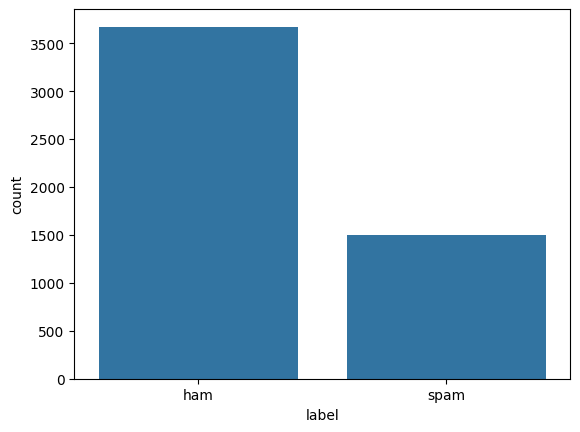

In [70]:
# Count how many Ham vs Spam emails
sns.countplot(x='label', data=data)
plt.show()

Notice that the dataset needs to be balanced because Ham samples are much more than Spam:

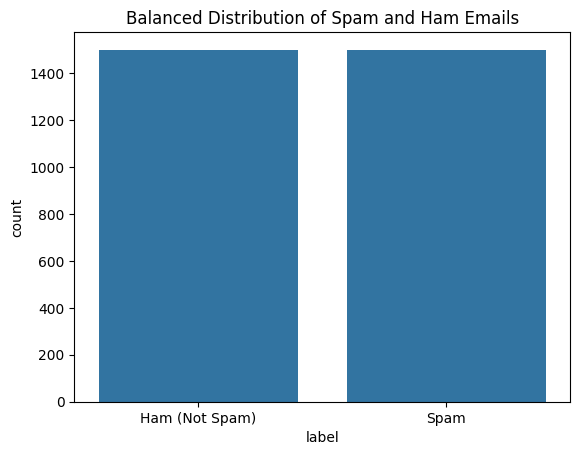

In [82]:
# -------------------------
# Balancing the labels column
# -------------------------
ham_msg = data[data['label'] == 'ham']
spam_msg = data[data['label'] == 'spam']

# Downsample Ham emails to match the number of Spam emails
ham_msg_balanced = ham_msg.sample(n=len(spam_msg), random_state=42) # You can set the random seed to any number

# Combine balanced data
balanced_data = pd.concat([ham_msg_balanced, spam_msg]).reset_index(drop=True)

# Visualize the balanced dataset
sns.countplot(x='label', data=balanced_data)
plt.title("Balanced Distribution of Spam and Ham Emails")
plt.xticks(ticks=[0, 1], labels=['Ham (Not Spam)', 'Spam'])
plt.show()

# **Preprocessing:** Textual data  needs to be clean before feeding it to model
**Apply Stemming or Lemmatization:** Removing “Subject” word

In [83]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.head()

Unnamed: 0 label                                               text  \
0        3444   ham  : conoco - big cowboy\r\ndarren :\r\ni ' m not...   
1        2982   ham  : feb 01 prod : sale to teco gas processing\r\...   
2        2711   ham  : california energy crisis\r\ncalifornia  , s...   
3        3116   ham  : re : nom / actual volume for april 23 rd\r\n...   
4        1314   ham  : eastrans nomination changes effective 8 / 2 ...   

   label_num  
0          0  
1          0  
2          0  
3          0  
4          0

**Apply Punctuations Removal:** Removing (:,.,?!)

In [84]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

Unnamed: 0 label                                               text  \
0        3444   ham   conoco  big cowboy\r\ndarren \r\ni  m not sur...   
1        2982   ham   feb 01 prod  sale to teco gas processing\r\ns...   
2        2711   ham   california energy crisis\r\ncalifornia   s p...   
3        3116   ham   re  nom  actual volume for april 23 rd\r\nwe ...   
4        1314   ham   eastrans nomination changes effective 8  2  0...   

   label_num  
0          0  
1          0  
2          0  
3          0  
4          0

**Apply Stopwords Removal:** Removing (is, the, at)

In [85]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

Unnamed: 0 label                                               text  \
0        3444   ham  conoco big cowboy darren sure help know else a...   
1        2982   ham  feb 01 prod sale teco gas processing sale deal...   
2        2711   ham  california energy crisis california  power cr...   
3        3116   ham  nom actual volume april 23 rd agree eileen pon...   
4        1314   ham  eastrans nomination changes effective 8 2 00 p...   

   label_num  
0          0  
1          0  
2          0  
3          0  
4          0

We can visualize email words of Ham or Spam:

After cleaning which made the text simpler the result will be important words (company, offer, free, win).

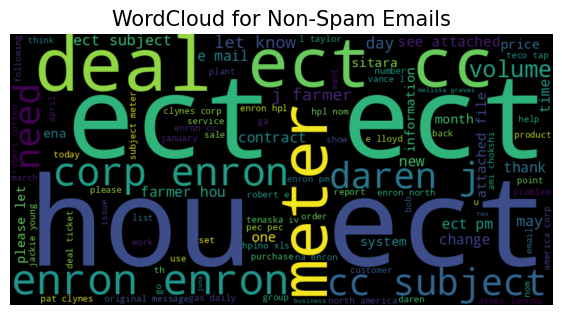

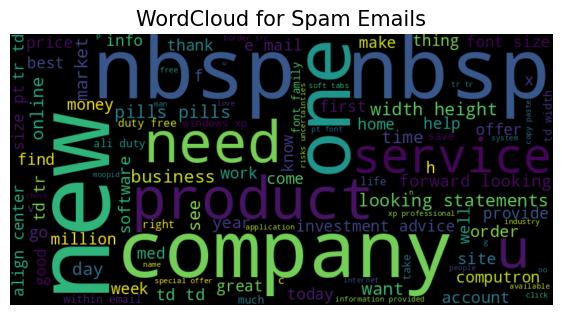

In [86]:
from wordcloud import WordCloud
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
    wc = WordCloud(background_color='black', max_words=100, width=800, height=400).generate(email_corpus)
    plt.figure(figsize=(7, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} Emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['label'] == 'ham'], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label'] == 'spam'], typ='Spam')

# **Data splits:** split data into test and training, apply tokenization and padding
Our data is english words, it must be converted to numbers to become trainable.

*   **Tokenization**: Converts each word into a unique integer.
*   **Padding**: Ensures that all text sequences have the same length, making them compatible with the model.



In [87]:
# Split data: 80% of data is used to train the model, 20% is used to test it.
train_X, test_X, train_Y, test_Y = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)

# Tokenization → each word becomes a number
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_len = 100  # Maximum sequence length
# Padding → all emails are made the same length
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

train_Y = (train_Y == 'spam').astype(int)
test_Y = (test_Y == 'spam').astype(int)

# **Build Deep learning Model:** add sequential layers
*   Embedding Layer: Learns vector representations of words.
*   LSTM Layer: Captures patterns in sequences.
*   Fully Connected Layer: Extracts relevant features.
*   Output Layer: Predicts whether an email is spam or not.
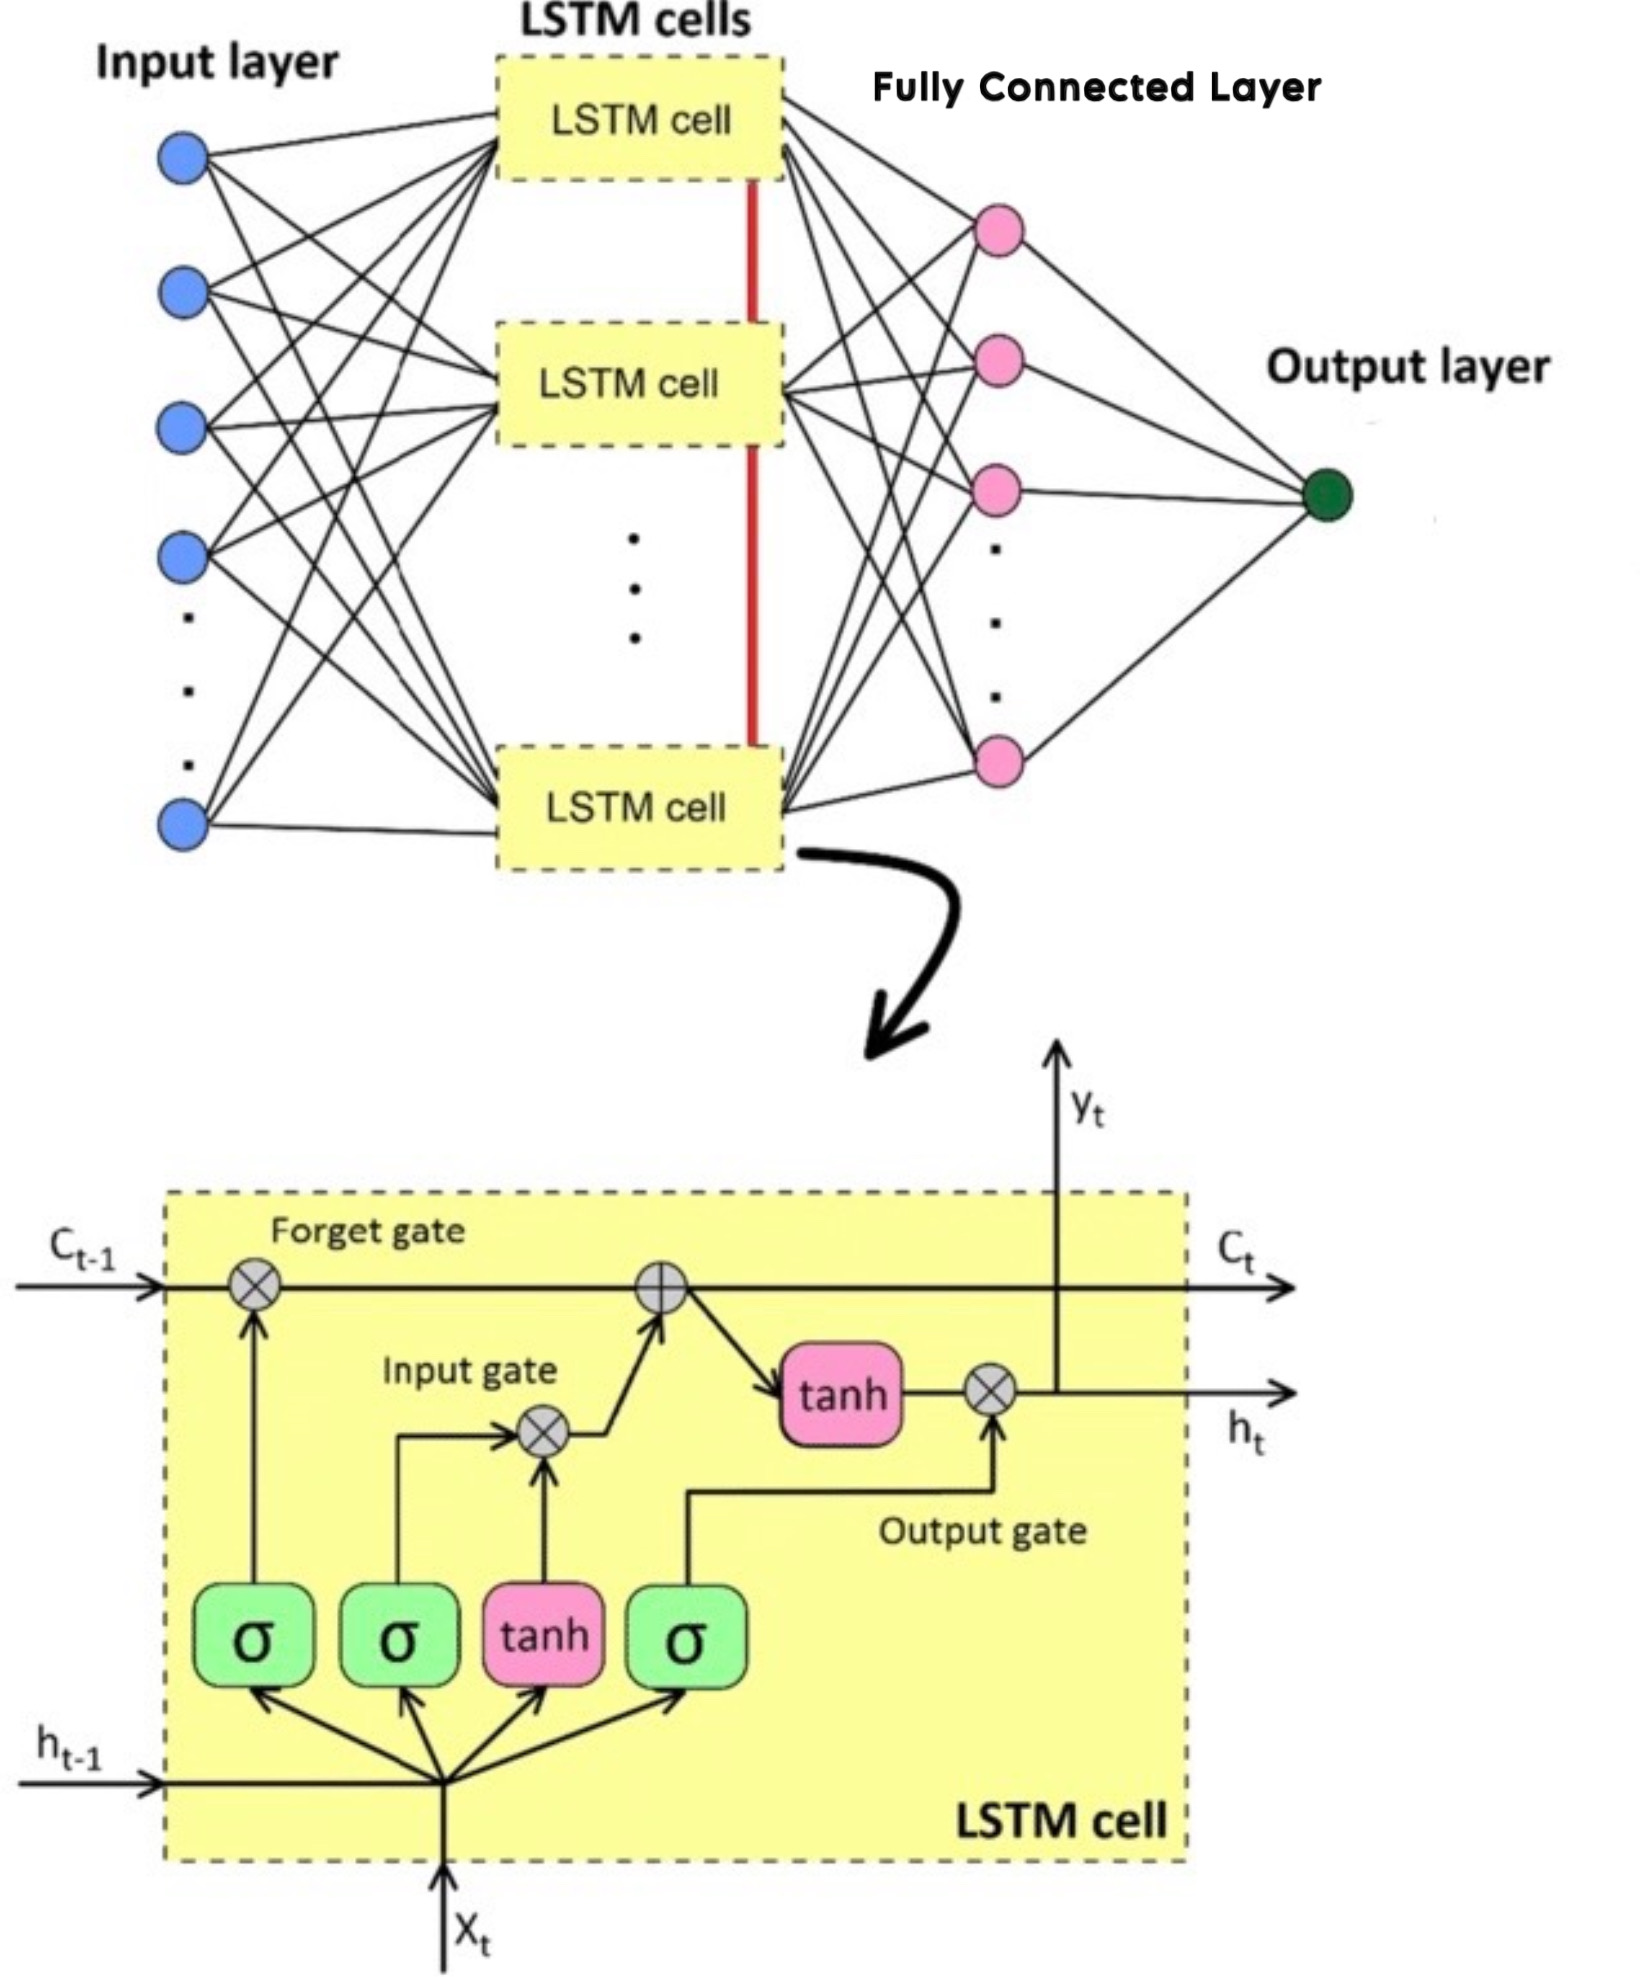


In [88]:
# Model is built with layers of “neurons”. Each number means how many neurons (units) that layer has.
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32), # 32 neurons so each word gets a 32-character ID card describing it
    tf.keras.layers.LSTM(16), # 16 neurons for pattern recognition
    tf.keras.layers.Dense(32, activation='relu'), # 32 neurons for learning features like “email contains money words”
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 Output layer (0 = Ham, 1 = Spam)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

# **Training the model:**
Now we can make the model learn patterns distinguishing Ham vs. Spam and evaluate the model on the test data to measure its performance.

In [89]:
# Stops training early if the model is no longer improving to prevent overfitting
es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
# Lowers the learning rate if the model stops improving
lr = ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=0)

history = model.fit(
    train_sequences, train_Y,
    validation_data=(test_sequences, test_Y),
    epochs=20, # how many times the model will learn from the full dataset
    batch_size=32, # Instead of waiting to process all 10,000 emails at once, we break them into 32-sized batches.
    callbacks=[lr, es]
)

test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:789: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5356 - loss: 0.6926 - val_accuracy: 0.5850 - val_loss: 0.6785 - learning_rate: 0.0010
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7585 - loss: 0.4853 - val_accuracy: 0.9683 - val_loss: 0.1479 - learning_rate: 0.0010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9659 - loss: 0.1493 - val_accuracy: 0.9667 - val_loss: 0.1473 - learning_rate: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9623 - loss: 0.1551 - val_accuracy: 0.9633 - val_loss: 0.1601 - learning_rate: 0.0010
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9682 - loss: 0.1371 - val_accuracy: 0.9617 - val_loss: 0.1672 - learning_rate: 0.0010
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9742 - loss: 0.1330
Test Loss : 0.1478542536497116
Test Accuracy : 0.9683333039283752


# **Let's Test Our Trained Model on Email**

In [92]:
# -------------------------
# Example for Spam Mail
# -------------------------
sample_email = [
    "Congratulations! You've won a $1000 gift card. Click here to claim your prize now!"
]
# Example for Ham Mail : "Please override pops daily volume to reflect daily activity you can obtain from gas control. This change is needed asap for economics."

# Use the same tokenizer used on trained dataset to convert text to numbers
sample_seq = tokenizer.texts_to_sequences(sample_email)

# Add padding to make the length of the email the same as trained dataset
sample_seq = pad_sequences(sample_seq, maxlen=max_len, padding='post', truncating='post')

# Predict result using the model we trained
prediction = model.predict(sample_seq)

print("Prediction score:", prediction[0][0])
# Convert result into Spam or Ham
if prediction[0][0] > 0.5: # Use the threshold 0.5 for the prediction
    print("📩 Result : Spam")
else:
    print("📩 Result : Ham")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Prediction score: 0.9339143
📩 Result : Spam


_______________________________________________________________________________
# **Lab 3: Malware Analysis**
In the third lab we will learn how to analyze Malware using SOREL dataset that comprise 20 million Windows PE malware binary.

Note: Do not download the dataset directly on you device, use a Virtual Machine or coding environment! Malware detection needs a dataset with normal files (benign) and malwares and it is dangrouse to download. I only downloaded one malware file bytes (not the actual malware) in my drive not on my device!

We will try Malware Analysis converting binary to image for it to be ready to analyze by Convulotional Neural Networks (CNN) models:

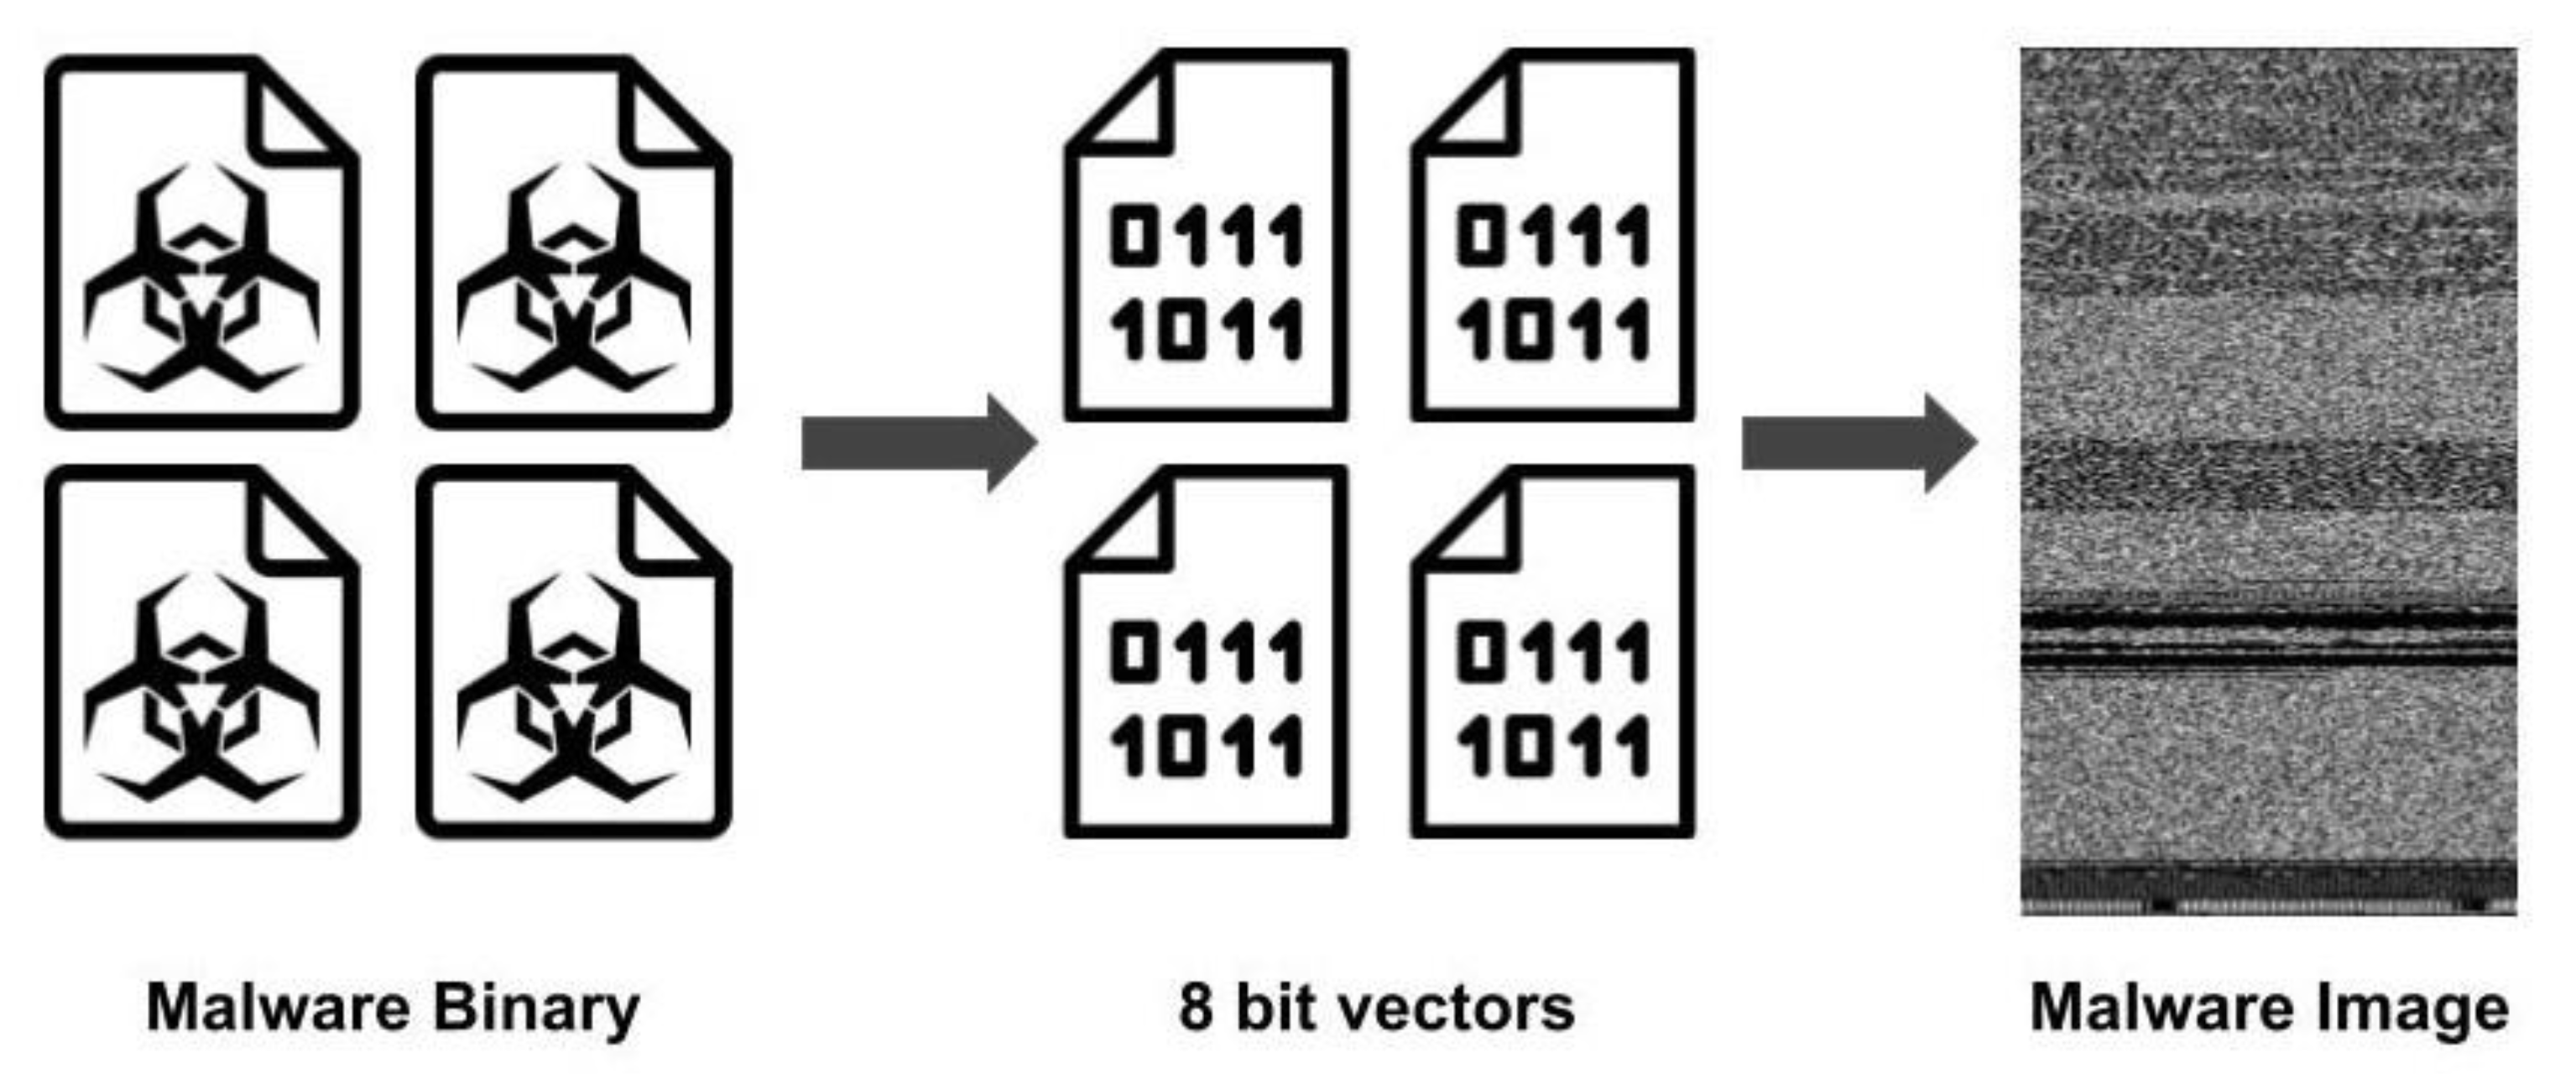

In [ ]:
import os
import math
import requests
import io
from pathlib import Path
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd

# IMPORTANT: Do not execute files. Read files as bytes only.

WORKDIR = "/content/drive/MyDrive/Datasets/safe_malware_analysis"
os.makedirs(WORKDIR, exist_ok=True)

# -------------------------
# Download one Sorel binary as bytes
# -------------------------
url = "http://sorel-20m.s3.amazonaws.com/09-DEC-2020/binaries/047316c8118e6e4d088c4aaebab34a031e62ecc42ecefc4cf0c3d4f9eb91dc30"

example_sha = url.split("/")[-1]
example_file = Path(WORKDIR) / example_sha

if not example_file.exists():
    print("Downloading one example binary (read bytes only)...")
    r = requests.get(url, stream=True, timeout=60)
    r.raise_for_status()
    # save raw bytes
    with open(example_file, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192): # Instead of downloading the whole file at once, Python reads it in small pieces (chunks)
            if chunk:
                f.write(chunk)
    print("Saved:", example_file)
else:
    print("Example binary already saved:", example_file)

Saved: /content/drive/MyDrive/Datasets/safe_malware_analysis/047316c8118e6e4d088c4aaebab34a031e62ecc42ecefc4cf0c3d4f9eb91dc30


# **Binary -> image conversion function**
*We read the malware binary as a byte = 8 bits*

With 8 bits, you can represent numbers from 0 → 255 (that’s $2^8$ = 256
possible values).

Example:

* 00000000 binary → 0 decimal

* 11111111 binary → 255 decimal

* 01111111 binary → 127 decimal

*In a **2D grayscale image**:*

Each pixel = one number that represents brightness.

Example:

* Byte 0 → pure black pixel.

* Byte 255 → pure white pixel.

* Byte 127 → medium gray.

*An **image** is a 2D rectangle with height and width:*

We reshape a 1D bytes row [34, 198, 5, 127, 255, 12, 0, 89]

into 2D bytes RowsxColumns:

Col 1 Col 2 Col 3 Col 4

Row 1 → [34, 198, 5, 127]

Row 2 → [255, 12, 0, 89]

*Add **padding** to bytes with zeros:*

Since the width is fixed 256, the change in height calculated with this method will result pixel gaps:

$$ \text{height} = \lceil \frac{\text{number of bytes}}{\text{width}} \rceil $$

Example:

* File has 1027 bytes

* Width = 256

* Height = ceil(1027 / 256) = ceil(4.0117) = 5 rows

* Total pixels needed = 5 × 256 = 1280 pixels

* Missing bytes = 1280 − 1027 = 253 bytes

We add zeros (black) at the end so the 1D byte array becomes exactly the size we need to reshape into a rectangle.

Saved preview PNG: /content/drive/MyDrive/Datasets/safe_malware_analysis/047316c8118e6e4d088c4aaebab34a031e62ecc42ecefc4cf0c3d4f9eb91dc30.png


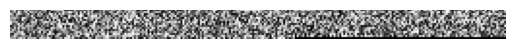

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def binary_to_image_bytes(filepath, width=256, pad_value=0):
    """
    A Malware binary is just a bunch of bytes (numbers 0–255), We can rearranges
    those bytes into a 2D grayscale image as numpy uint8 array:
    - Width: pixel width for the image set to 256
    - Height = depends on the number of bytes in the file ceil(num_bytes / width)
    - pad_value: value to use for padding the last row if needed (0-255)
    Returns: HxW numpy array dtype=uint8 a a rectangle of the 2D image
    """
    with open(filepath, "rb") as f:
        b = f.read()
    arr = np.frombuffer(b, dtype=np.uint8)  # values from 0-255
    if arr.size == 0:
        # Avoid empty files — return 1xwidth row of pad_value
        h = 1
        img = np.full((h, width), pad_value, dtype=np.uint8)
        return img
    # height = ceil(total_bytes / width)
    h = math.ceil(arr.size / width)
    target_size = h * width
    if arr.size < target_size:
        # pad with zeros at the end
        pad_len = target_size - arr.size
        arr = np.pad(arr, (0, pad_len), constant_values=pad_value)
    # Reshape 1D bytes array become 2D image array
    img = arr.reshape((h, width))
    return img

# Utility: save image for inspection (PIL)
def save_image_from_binary(filepath, out_png_path, width=256):
    img_arr = binary_to_image_bytes(filepath, width=width)
    img = Image.fromarray(img_arr)  # mode 'L'
    img.save(out_png_path)

# Quick test: convert downloaded example to PNG
preview_png = Path(WORKDIR) / f"{example_sha}.png"
save_image_from_binary(example_file, preview_png, width=256)
print("Saved preview PNG:", preview_png)
img = Image.open(preview_png)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

# **We can train CNN now!**
Let's use a dataset from kaggle that contains malware files only, it will predict one of the 25 malware families because it is not trained on benign files.
the dataset Link: https://www.kaggle.com/datasets/manmandes/malimg

In [66]:
# ==========================================================
# 📥 Download and setup the Malimg dataset
# ==========================================================
print("Downloading Malimg dataset...")
path = kagglehub.dataset_download("manmandes/malimg")
print("Path to dataset files:", path)

100%|██████████| 1.09G/1.09G [00:16<00:00, 72.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/manmandes/malimg/versions/1


# **Train and Evaluate the model**
The dataset is already 2D gray scale images of malware binaries

Exploring dataset structure...
Successfully loaded 9339 images from 25 families
Malware families: ['Obfuscator.AD', 'Fakerean', 'Lolyda.AA2', 'Alueron.gen!J', 'Lolyda.AT', 'Agent.FYI', 'C2LOP.P', 'Dialplatform.B', 'Swizzor.gen!E', 'Malex.gen!J', 'Lolyda.AA1', 'Dontovo.A', 'Rbot!gen', 'Allaple.A', 'VB.AT', 'Instantaccess', 'C2LOP.gen!g', 'Skintrim.N', 'Wintrim.BX', 'Yuner.A', 'Autorun.K', 'Lolyda.AA3', 'Swizzor.gen!I', 'Allaple.L', 'Adialer.C']
Final dataset shape: (9339, 256, 256, 1)
Number of classes: 25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,147,417 (42.52 MB)

 Trainable params: 11,145,433 (42.52 MB)

 Non-trainable params: 1,984 (7.75 KB)

Training samples: 5976
Validation samples: 1495
Test samples: 1868
Starting training...
Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 180ms/step - accuracy: 0.6517 - loss: 5.0582 - val_accuracy: 0.0214 - val_loss: 22.6433 - learning_rate: 0.0010
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.8899 - loss: 1.1116 - val_accuracy: 0.0896 - val_loss: 22.6335 - learning_rate: 0.0010
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9230 - loss: 0.6633 - val_accuracy: 0.9204 - val_loss: 0.3168 - learning_rate: 0.0010
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9338 - loss: 0.4078 - val_accuracy: 0.9585 - val_loss: 0.1700 - learning_rate: 0.0010
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9408 - loss: 0.3484 - val_accuracy: 0.9699 - val_loss: 0.1786 - learning_rate: 0.0010
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9396 - loss: 0.3082 - val_accuracy: 0.9478 - val_loss: 0.2605 - learni

Making predictions on test set...


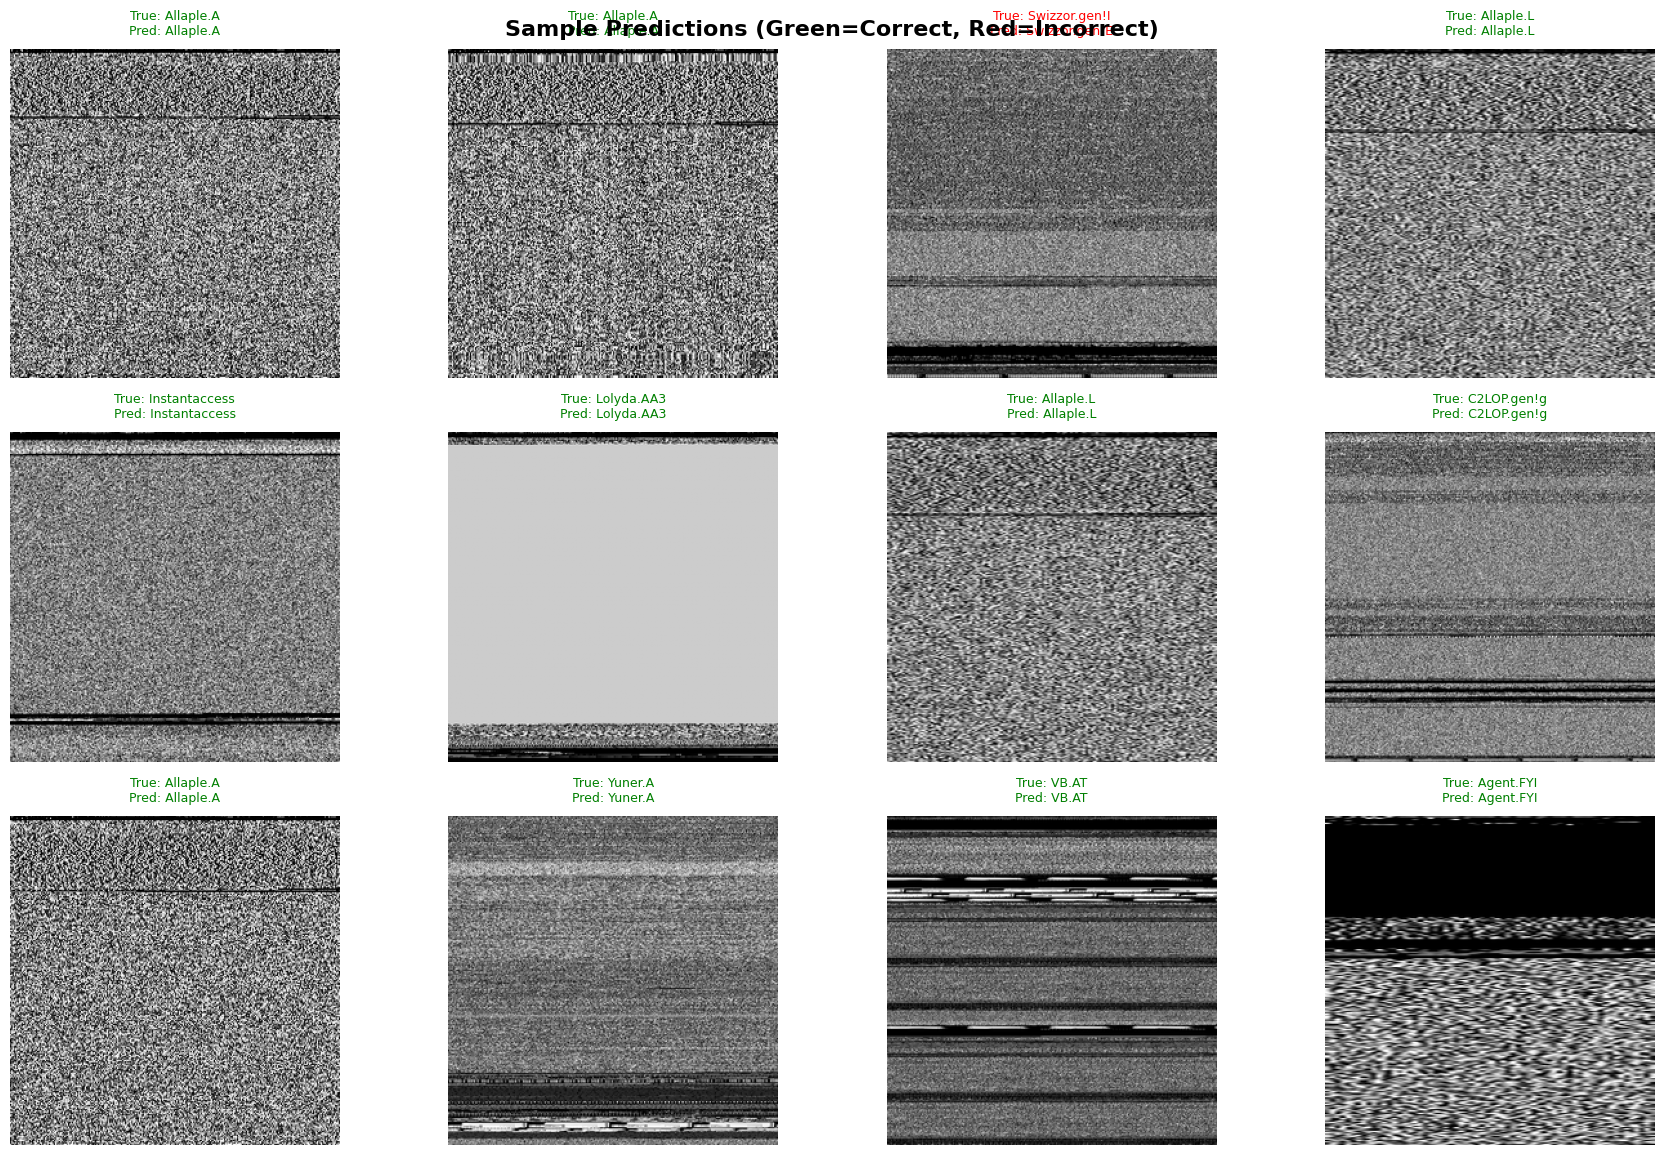


📊 Classification Report:
                precision    recall  f1-score   support

 Obfuscator.AD     1.0000    1.0000    1.0000        28
      Fakerean     1.0000    1.0000    1.0000        76
    Lolyda.AA2     0.9730    0.9730    0.9730        37
 Alueron.gen!J     1.0000    1.0000    1.0000        40
     Lolyda.AT     1.0000    0.9688    0.9841        32
     Agent.FYI     1.0000    1.0000    1.0000        23
       C2LOP.P     0.9286    0.8966    0.9123        29
Dialplatform.B     1.0000    1.0000    1.0000        36
 Swizzor.gen!E     0.7419    0.8846    0.8070        26
   Malex.gen!J     1.0000    0.9259    0.9615        27
    Lolyda.AA1     0.9556    1.0000    0.9773        43
     Dontovo.A     1.0000    1.0000    1.0000        32
      Rbot!gen     1.0000    1.0000    1.0000        32
     Allaple.A     1.0000    1.0000    1.0000       590
         VB.AT     1.0000    1.0000    1.0000        82
 Instantaccess     1.0000    1.0000    1.0000        86
   C2LOP.gen!g     0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


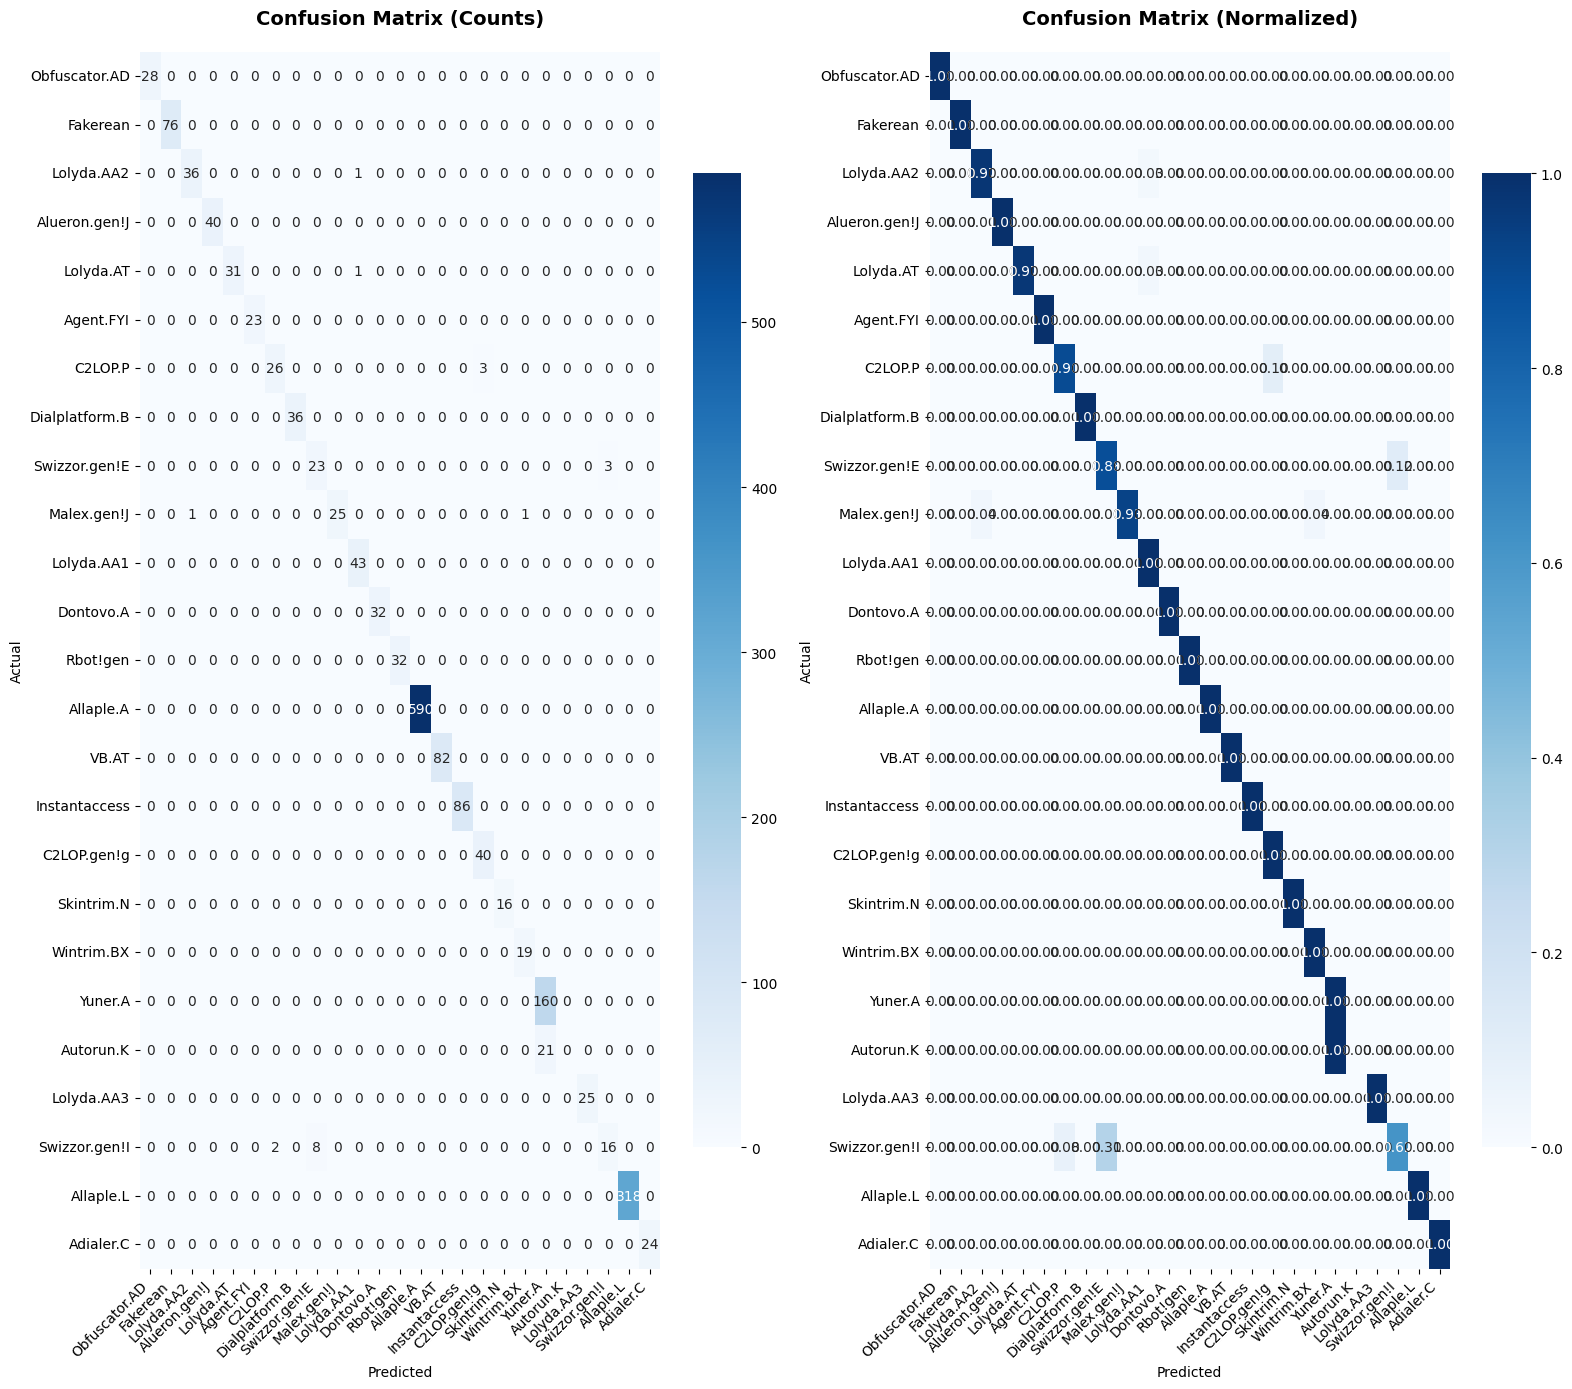


🎯 Class-wise Accuracy:
Obfuscator.AD       : 1.0000
Fakerean            : 1.0000
Alueron.gen!J       : 1.0000
Agent.FYI           : 1.0000
Dialplatform.B      : 1.0000
Lolyda.AA1          : 1.0000
Dontovo.A           : 1.0000
Rbot!gen            : 1.0000
Allaple.A           : 1.0000
VB.AT               : 1.0000
Instantaccess       : 1.0000
C2LOP.gen!g         : 1.0000
Skintrim.N          : 1.0000
Wintrim.BX          : 1.0000
Yuner.A             : 1.0000
Lolyda.AA3          : 1.0000
Allaple.L           : 1.0000
Adialer.C           : 1.0000
Lolyda.AA2          : 0.9730
Lolyda.AT           : 0.9688
Malex.gen!J         : 0.9259
C2LOP.P             : 0.8966
Swizzor.gen!E       : 0.8846
Swizzor.gen!I       : 0.6154
Autorun.K           : 0.0000


In [67]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import kagglehub
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ==========================================================
# 📥 Path to downloaded Malimg dataset
# ==========================================================

path = "/root/.cache/kagglehub/datasets/manmandes/malimg/versions/1"

def explore_and_load_dataset(dataset_path, img_size=(256, 256)):
    """Explore the dataset structure and load images"""
    dataset_path = Path(dataset_path)

    print("Exploring dataset structure...")

    def find_image_folders(start_path, depth=0, max_depth=3):
        """Recursively find folders containing PNG images"""
        if depth > max_depth:
            return []

        image_folders = []
        for item in start_path.iterdir():
            if item.is_dir():
                # Check if this folder contains PNG files
                png_files = list(item.glob("*.png"))
                if png_files:
                    image_folders.append(item)
                else:
                    # Recursively search subdirectories
                    image_folders.extend(find_image_folders(item, depth + 1, max_depth))
        return image_folders

    # Find all folders containing images
    image_folders = find_image_folders(dataset_path)

    images = []
    labels = []
    family_names = []
    family_to_label = {}

    # Load images from all found folders
    for folder in image_folders:
        family_name = folder.name
        if family_name not in family_to_label:
            family_to_label[family_name] = len(family_names)
            family_names.append(family_name)

        label_id = family_to_label[family_name]
        image_files = list(folder.glob("*.png"))

        for img_path in image_files:
            try:
                img = Image.open(img_path).convert('L')
                img = img.resize(img_size, Image.LANCZOS)
                img_array = np.array(img, dtype=np.float32) / 255.0
                images.append(img_array)
                labels.append(label_id)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels), family_names, family_to_label

# Load dataset with exploration
X, y, family_names, family_mapping = explore_and_load_dataset(path)

print(f"Successfully loaded {X.shape[0]} images from {len(family_names)} families")
print("Malware families:", family_names)

# Reshape for CNN (add channel dimension for grayscale)
X = np.expand_dims(X, -1)  # Shape: (N, 256, 256, 1)
print(f"Final dataset shape: {X.shape}")

# ==========================================================
# 🔢 Convert to categorical for multi-class classification
# ==========================================================
num_classes = len(family_names)
y_categorical = tf.keras.utils.to_categorical(y, num_classes=num_classes)

print(f"Number of classes: {num_classes}")

# ==========================================================
# 🧠 Build CNN model for multi-class classification
# ==========================================================
model = tf.keras.models.Sequential([
    # First Convolutional Block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Fourth Convolutional Block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Fifth Convolutional Block
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==========================================================
# 🎯 Split data and train the model
# ==========================================================
# Split the data
train_X, test_X, train_y, test_y = train_test_split(
    X, y_categorical, test_size=0.2, stratify=y, random_state=42
)

# Further split training data for validation
train_X, val_X, train_y, val_y = train_test_split(
    train_X, train_y, test_size=0.2, stratify=np.argmax(train_y, axis=1), random_state=42
)

print(f"Training samples: {train_X.shape[0]}")
print(f"Validation samples: {val_X.shape[0]}")
print(f"Test samples: {test_X.shape[0]}")

# ==========================================================
# 🏋️‍♂️ Train the model
# ==========================================================
# Add callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1
    )
]

print("Starting training...")
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# ==========================================================
# 📊 Evaluate and visualize results
# ==========================================================
# Final evaluation on test set
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print(f"\n🎯 Final Test Accuracy: {test_accuracy:.4f}")
print(f"🎯 Final Test Loss: {test_loss:.4f}")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================================
# 🔍 Make predictions and show some examples
# ==========================================================
def plot_sample_predictions(images, true_labels, pred_labels, family_names, num_samples=12):
    """Plot sample images with their true and predicted labels"""
    plt.figure(figsize=(18, 12))

    for i in range(min(num_samples, len(images))):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')

        true_family = family_names[true_labels[i]]
        pred_family = family_names[pred_labels[i]]

        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(f'True: {true_family}\nPred: {pred_family}',
                 color=color, fontsize=9, pad=10)
        plt.axis('off')

    plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)',
                fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.show()

# Get predictions
print("Making predictions on test set...")
predictions = model.predict(test_X, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_y, axis=1)

# Calculate accuracy per class
class_accuracy = {}
for class_id in range(num_classes):
    class_mask = true_classes == class_id
    if np.sum(class_mask) > 0:
        class_acc = np.mean(predicted_classes[class_mask] == true_classes[class_mask])
        class_accuracy[family_names[class_id]] = class_acc

# Plot some examples
plot_sample_predictions(test_X, true_classes, predicted_classes, family_names)

# ==========================================================
# 📈 Classification report and confusion matrix
# ==========================================================
print("\n📊 Classification Report:")
print(classification_report(true_classes, predicted_classes,
                          target_names=family_names, digits=4))

# Plot confusion matrix
plt.figure(figsize=(16, 14))
cm = confusion_matrix(true_classes, predicted_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=family_names, yticklabels=family_names,
            cbar_kws={'shrink': 0.8})
plt.title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=family_names, yticklabels=family_names,
            cbar_kws={'shrink': 0.8})
plt.title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# ==========================================================
# 📊 Class distribution and accuracy analysis
# ==========================================================
# Plot class distribution
plt.figure(figsize=(15, 8))
class_counts = [np.sum(y == i) for i in range(num_classes)]
plt.barh(family_names, class_counts, color='skyblue')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Dataset', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print class-wise accuracy
print("\n🎯 Class-wise Accuracy:")
for family, acc in sorted(class_accuracy.items(), key=lambda x: x[1], reverse=True):
    print(f"{family:20}: {acc:.4f}")